# Binomial walk

As a warm-up for Brownian motion, it can be helpful to start from a simpler case. (The following is inspired by lecture notes by Tomas Bohr for his course in statistical mechanics).

We consider a particle that takes $N$ steps either in the positive direction with probability $p=\tfrac 12$ or in the negative direction (with probability $q=1-p=p$). The probability of $m$ forward steps is then
$$
P(m, N) = \left(\frac 12 \right)^N \frac{N!}{(N - m)! m!}
$$

If each step has distance $d$ (units of length) then with $m$ forward steps (and therefore $N-m$ backward steps), the distance covered will be
$$ x = d (2m - N) $$


## Analysis

### Calculating expected distance and expected square distance


We now wish to calculate the expected distance, $\langle x \rangle$ and the expected square distance $\langle x^2 \rangle$. We shall see that they are
$$ \langle x \rangle = d(2 \langle m \rangle - N) = 0 $$
and
$$ \langle x^2 \rangle = N d^2 $$

These results are similar but simpler to the Brownian motion of a particle in a fluid and we can use them to practice some of the shared mathematical techniques. First we calculate the expected distance, then the expected square distance.

First we find the mean and expected square of the number of forward steps. Starting from the definition of the expectation, we take out a shared factor, shorten the fraction and recognize the remaining sum as a normalization sum $(\sum_{m=0}^{N-1} P(m, N-1) = 1)$.
$$
\langle m \rangle = \sum_{m=0}^N P(m, N) m \\
= \frac{N!}{2^N} \sum_{m=0}^N \frac{m}{(N - m)! m!} 
= \frac{N!}{2^N} \sum_{m=0}^N \frac{1}{(N - 1 - (m- 1))! (m-1)!}
= \frac{N}{2} \left(\frac{(N-1)!}{2^{N-1}} \sum_{r=0}^{N-1} \frac{1}{(N - 1 - r)! r!} \right)
= \frac{N}{2}
$$

The helpful trick here was to shorten the fraction and get a normalization sum. Do that once more to obtain
$$
\langle m (m-1) \rangle = \frac{N (N - 1)}{4}
$$
Now we can calculate any function of $\langle m (m - 1 )\rangle$, which is not quite $\langle m^2 \rangle$ but close enough (when we can coax occurances of $m^2$ into $m(m-1)$).

The expectation $\langle x \rangle = 0$ should be easy to confirm. The expected square distance can be found with
$$
\langle x^2 \rangle
= \langle d^2(2 \langle m \rangle - N)^2 \rangle
= d^2 \langle 4m^2 - 4 mN + N^2 \rangle
= d^2 \left(4 \langle m(m-1)\rangle - 4(N-1) \langle m \rangle + N^2 \right)
= d^2 N
$$


### The continuum limit

We now wish to investigate how the particle moves in the continuum limit, where the time between steps and step lengths vanish. First we rephrase our problem in continuous terms. Then we connect the temporal evolution with the spatial profile in both cases and arrive at the diffusion equation.



Let $P_N(n)$ be the probabilty of finding the particle at location $n$ after $N$ total steps. If the (many) steps each take a time-interval of $\tau$ to complete, then time at $N$ steps will be $t = N \tau$. We want a continuous time, corresponding to a vanishing step length between steps, $\tau \rightarrow 0$. As described above, we can use spatial length $x = nd$ instead of location $n$ to identify position. With time and space instead of step count and position, a natural continuum limit is
$$
P_N(n) \rightarrow P(x,  t)
$$

We can now let the time-interval between steps, $\tau$, become small. Remember that the differential quotient is
$$
\lim_{h \rightarrow 0} \frac{P(x,  t + h) - P(x,  t)}{h} = \frac{\partial P}{\partial t}
$$
With $\tau$ playing the role of the infinitesimal step $h$, we find
$$
P(x, t + \tau) - P(x, t) \rightarrow \tau \frac{\partial P}{\partial t} \qquad \text{for}\; \tau \rightarrow 0
$$

Similarly, the second spatial derivative has a limiting fraction
$$
\lim_{h \rightarrow 0} \frac{P(x+h, t) + P(x-h, t) - 2 P(x, t)}{h^2} = \frac{\partial^2 P}{\partial x^2}
$$
When $d$ then plays the role of ever smaller distances in each step, we get
$$
P(x+d, t) + P(x-d, t) - 2 P(x, t) \rightarrow d^2 \frac{\partial^2 P}{\partial x^2}
$$


We now connect the temporal evolution with the spatial profile. In our case, with $p=\tfrac 12$, the probability that the particle is at location $n$ at $N+1$ is the sum of two cases: Either the particle was at $n-1$ and moved forward or the particle was at $n+1$ and moved backward (each with probability $\tfrac 12$).
$$
P_{N+1}(n) = \frac 12 P_N(n-1) + \frac 12 P_N(n+1)
$$
The "temporal" change in the discrete case of finding the particle at location $n$ is the difference $P_{N+1} - P_N$. Subtract $P_N$ from both sides and re-arrange
$$
P_{N+1}(n) - P_N(n)
= \frac 12 P_N(n-1) + \frac 12 P_N(n+1) - P_N(n)
= \frac 12 \left(P_N(n-1) + P_N(n+1) - 2 P_N(n) \right)
$$

Reprhasing the first and last part with our continuum notation
$$
P(x, t + \tau) - P(x, t) = \frac 12 ( P(x-d, t) + P(x+d, t) - 2 P(x,t) )
$$

As $\tau \rightarrow 0$ and $d \rightarrow 0$ we have from above therefore that
$$
\tau \frac{\partial P}{\partial t} = \frac 12 d^2 \frac{\partial^2 P}{\partial x^2}
$$
or
$$
\frac{\partial P}{\partial t} = D \frac{\partial^2 P}{\partial x^2}
$$
which is the diffusion with $D = \tfrac{d^2}{2\tau}$. In this case, the diffusion coefficient is the (half the) ratio of square step distance to interval between steps.

## Simulations

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from math import factorial

## Where is the discrete particle?

x = d * (2m - N)


In [226]:
N1 = int(5)
N2 = int(10)
N3 = int(40)
maxN = max(N1, N2, N3)

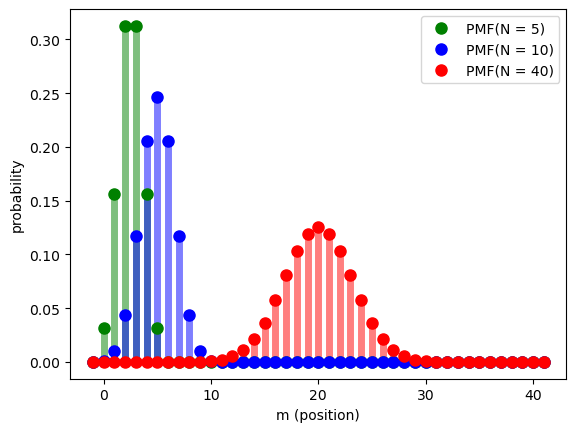

In [233]:
M = np.arange(0, maxN)
M = np.arange(binom.support(maxN, p)[0] - 1, binom.support(maxN, p)[1] + 2)

fig, ax = plt.subplots(1, 1)
ax.plot(M, binom.pmf(M, N1, p), 'go', ms=8, label=f'PMF(N = {N1})')
ax.vlines(M, 0, binom.pmf(M, N1, p), colors='g', lw=5, alpha=0.5)

ax.plot(M, binom.pmf(M, N2, p), 'bo', ms=8, label=f'PMF(N = {N2})')
ax.vlines(M, 0, binom.pmf(M, N2, p), colors='b', lw=5, alpha=0.5)

ax.plot(M, binom.pmf(M, N3, p), 'ro', ms=8, label=f'PMF(N = {N3})')
ax.vlines(M, 0, binom.pmf(M, N3, p), colors='r', lw=5, alpha=0.5)

ax.legend()
ax.set_xlabel("m (position)")
ax.set_ylabel("probability")

plt.show()

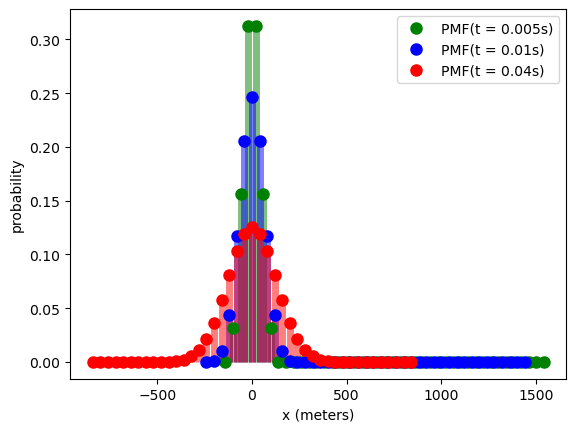

In [241]:
d = 20 # meter
X1 = d * (2 * M - N1 * np.ones_like(M))
X2 = d * (2 * M - N2 * np.ones_like(M))
X3 = d * (2 * M - N3 * np.ones_like(M))

tau = 1e-3 # s

fig, ax = plt.subplots(1, 1)
ax.plot(X1, binom.pmf(M, N1, p), 'go', ms=8, label=f'PMF(t = {N1 * tau}s)')
ax.vlines(X1, 0, binom.pmf(M, N1, p), colors='g', lw=5, alpha=0.5)

ax.plot(X2, binom.pmf(M, N2, p), 'bo', ms=8, label=f'PMF(t = {N2 * tau}s)')
ax.vlines(X2, 0, binom.pmf(M, N2, p), colors='b', lw=5, alpha=0.5)

ax.plot(X3, binom.pmf(M, N3, p), 'ro', ms=8, label=f'PMF(t = {N3 * tau}s)')
ax.vlines(X3, 0, binom.pmf(M, N3, p), colors='r', lw=5, alpha=0.5)

ax.legend()
ax.set_xlabel("x (meters)")
ax.set_ylabel("probability")

plt.show()

In [2]:
N = 20
p = 1/2
np.random.binomial(N, p)

9

In [118]:
def P_N_n(N, n):
    #return binom.pmf(n, N, p)
    if n > N:
        return 0
    else:
        return (1/2)**N * factorial(N) / (factorial(N - n) * factorial(n))

P_N_n(10, 5)



0.24609375

In [120]:
binom.pmf(5e3, 1e4, p)

0.007978646139382652

In [22]:
tau = 1e-2 # seconds, time step
d = 1e-3 # meters, spatial step

N = 10
m = np.random.binomial(N, p)

t = N * tau
x = m * d

print("At time t = ", t, "s a sample particle is at location ", x, "m")

At time t =  0.1 s a sample particle is at location  0.004 m


In [97]:
#def P(x, t, D, tau):
x = 1e-3 # m
t = 2e-10 # s
D = 1e-10 # m^2 / s
tau = 1e-10 # s

N = t / tau
d = np.sqrt(2 * tau * D)

m = int(round((x + N)/(2 * d)))
m



7074603346

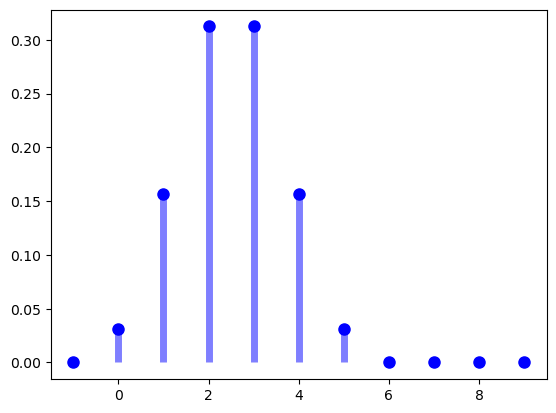

In [99]:
t = 5e-10 # s, measurement time

D = 1e-10 # m^2 / s, diffusion coefficient

tau = 1e-10 # s, discretization time step
d = np.sqrt(2 * tau)

N = t / tau

X = np.arange(-1, 10) #np.arange(binom.ppf(0.0, N, p), binom.ppf(1, N, p))
fig, ax = plt.subplots(1, 1)
ax.plot(X, binom.pmf(X, N, p), 'bo', ms=8, label="pmf")
ax.vlines(X, 0, binom.pmf(X, N, p), colors='b', lw=5, alpha=0.5)
plt.show()